<a href="https://colab.research.google.com/github/SnehaRGowda/Machine-Learning/blob/master/Website_phishing%20Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Phishing Website Detector***

**What is Phishing?**

Fraudsters send fake emails or set up fake web sites that mimic Yahoo!'s sign-in pages (or the sign-in pages of other trusted companies, such as eBay or PayPal) to trick you into disclosing your user name and password. This practice is sometimes referred to as "phishing" — a play on the word "fishing" — because the fraudster is fishing for your private account information.

**Website Phishing**

Phishing websites are created to dupe unsuspecting users into thinking they are on a legitimate site. The criminals will spend a lot of time making the site seem as credible as possible and many sites will appear almost indistinguishable from the real thing.

**Background of Problem Statement :**

The goal is to use one or more of the classification algorithms to train a model on the phishing website data set, which calculates the accuracy score on the test data. and to find which model gives the best accuracy score to predict if a website is a phishing website or not. 

**About the Dataset**

Its a collection of website URLs for 11000+ websites. Each sample has 30 website parameters(features) and a class label(target) identifying it as a phishing website or not (1 or -1).

Brief Description of the features in data set

● UsingIP (categorical - signed numeric) : { -1,1 }
● LongURL (categorical - signed numeric) : { 1,0,-1 }
● ShortURL (categorical - signed numeric) : { 1,-1 }
● Symbol@ (categorical - signed numeric) : { 1,-1 }
● Redirecting// (categorical - signed numeric) : { -1,1 }
● PrefixSuffix- (categorical - signed numeric) : { -1,1 }
● SubDomains (categorical - signed numeric) : { -1,0,1 }
● HTTPS (categorical - signed numeric) : { -1,1,0 }
● DomainRegLen (categorical - signed numeric) : { -1,1 }
● Favicon (categorical - signed numeric) : { 1,-1 }
● NonStdPort (categorical - signed numeric) : { 1,-1 }
● HTTPSDomainURL (categorical - signed numeric) : { -1,1 }
● RequestURL (categorical - signed numeric) : { 1,-1 }
● AnchorURL (categorical - signed numeric) : { -1,0,1 }

**Lets start to train the** **model**

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
from pylab import *
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
df = pd.read_csv("phishing.csv")

**Dataset**

In [0]:
df

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,NonStdPort,HTTPSDomainURL,RequestURL,AnchorURL,LinksInScriptTags,ServerFormHandler,InfoEmail,AbnormalURL,WebsiteForwarding,StatusBarCust,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,1,1,-1,1,0,0,-1,-1,-1,0,1,1,1,1,1,1,1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,11049,1,-1,1,-1,1,1,1,1,-1,-1,-1,1,1,1,1,-1,-1,1,0,-1,-1,-1,-1,1,1,-1,-1,1,1,1,1
11050,11050,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,0,-1,-1,1,-1,1,-1,1,1,1,1,1,1,-1,1,-1
11051,11051,1,-1,1,1,1,-1,1,-1,-1,1,1,1,1,0,-1,-1,1,1,0,1,1,1,1,1,1,1,-1,1,0,1,-1
11052,11052,-1,-1,1,1,1,-1,-1,-1,1,-1,1,1,-1,-1,1,-1,1,1,0,-1,1,-1,1,1,1,1,-1,1,1,1,-1


Checking if there are any missing values in the data


In [0]:
print(df.isnull().any())

Index                  False
UsingIP                False
LongURL                False
ShortURL               False
Symbol@                False
Redirecting//          False
PrefixSuffix-          False
SubDomains             False
HTTPS                  False
DomainRegLen           False
Favicon                False
NonStdPort             False
HTTPSDomainURL         False
RequestURL             False
AnchorURL              False
LinksInScriptTags      False
ServerFormHandler      False
InfoEmail              False
AbnormalURL            False
WebsiteForwarding      False
StatusBarCust          False
DisableRightClick      False
UsingPopupWindow       False
IframeRedirection      False
AgeofDomain            False
DNSRecording           False
WebsiteTraffic         False
PageRank               False
GoogleIndex            False
LinksPointingToPage    False
StatsReport            False
class                  False
dtype: bool


**Correlation Matrix**


In [0]:
#@title
def plotCorrelationMatrix(df, graphWidth):
    filename = df
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.title("Correlation Matrix")
    plt.colorbar(corrMat)
    plt.show()

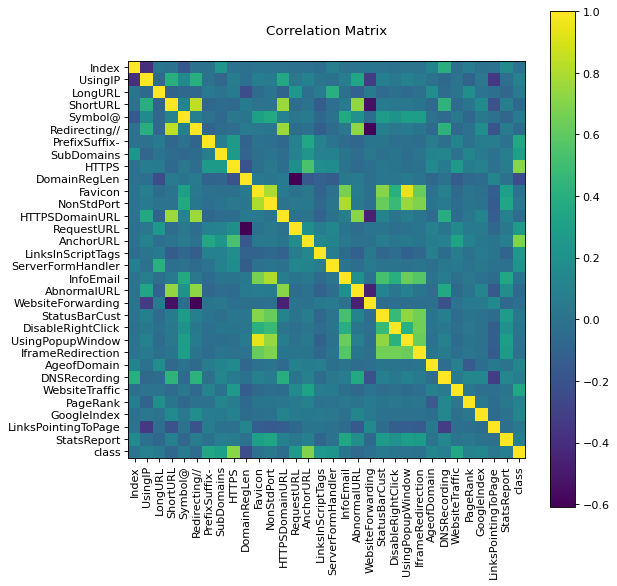

In [0]:
plotCorrelationMatrix(df, 8)

**Distribution graphs (bar graph) of sampled columns:**

In [0]:
#@title
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (4 * nGraphPerRow, 6 * nGraphRow), dpi = 50, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

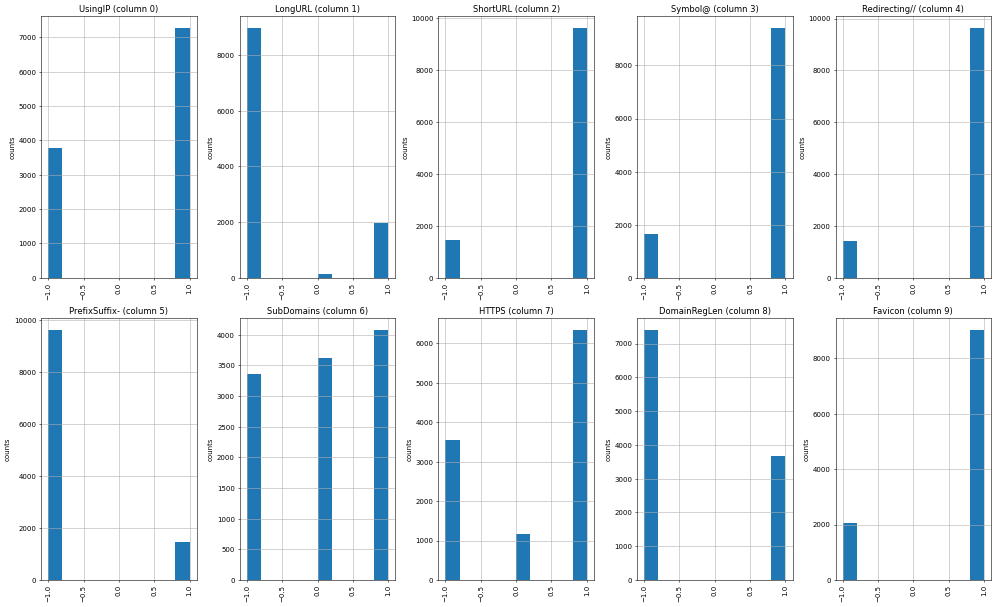

In [0]:
plotPerColumnDistribution(df, 10, 5)

In [0]:
abs(df.corr('pearson')['class']).sort_values()

UsingPopupWindow       0.000136
Favicon                0.000231
Index                  0.000802
IframeRedirection      0.003362
DisableRightClick      0.012675
InfoEmail              0.018039
WebsiteForwarding      0.020151
LinksPointingToPage    0.032694
NonStdPort             0.036461
Redirecting//          0.038885
HTTPSDomainURL         0.040096
StatusBarCust          0.041878
Symbol@                0.052994
LongURL                0.057661
AbnormalURL            0.060751
ShortURL               0.067931
DNSRecording           0.075579
StatsReport            0.079632
UsingIP                0.094033
PageRank               0.104593
AgeofDomain            0.121402
GoogleIndex            0.129000
ServerFormHandler      0.221380
DomainRegLen           0.225879
LinksInScriptTags      0.248415
RequestURL             0.253478
SubDomains             0.298231
WebsiteTraffic         0.346003
PrefixSuffix-          0.348588
AnchorURL              0.692895
HTTPS                  0.714704
class   

**Lets apply Logistic Regression and check its** **accuracy**

In [0]:
features= df.drop(columns='class')
features.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,NonStdPort,HTTPSDomainURL,RequestURL,AnchorURL,LinksInScriptTags,ServerFormHandler,InfoEmail,AbnormalURL,WebsiteForwarding,StatusBarCust,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
0,0,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1
1,1,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1
2,2,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1
3,3,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,1,1,-1,1,0,0,-1,-1,-1,0,1,1,1,1,1,1,1,-1,1,-1,-1


In [0]:
target=df['class']
target=pd.DataFrame(target)
df.rename(columns = {'class':'target'}, inplace = True) 

In [0]:
data=pd.concat([features,target],axis=1)

**I have taken two features HTTPS and AnchorURL as they are most correlated to the target, and also, these two features acts as an important parameter in a website url.**

In [0]:
df1 = df[['HTTPS','AnchorURL','target']]

Scaler Transformation

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df1_scaled = scaler.fit_transform(df1)

In [0]:
x1 = (df1_scaled[:,0])   
x2 = (df1_scaled[:,1])
y = (df1_scaled[:,2])

**Normalizing the data**

In [0]:
x1 = (x1 - x1.min()) / (x1.max() - x1.min())
x2 = (x2 - x2.min()) / (x2.max() - x2.min())
y = (y - y.min()) / (y.max() - y.min())

**Split the data into respective test and train**

In [0]:
x1_train, x1_test,x2_train,x2_test, y_train, y_test = train_test_split(x1,x2,y,test_size=0.2)

**Defining the Model**

In [0]:
def sigmoid(z):             
  return 1/(1+np.exp(-z))

In [0]:
def error(a,b,c,x1,x2,y):
  error = 0
  N=len(y)
  for i in range(N):
    f= (a*x1[i]+b*x2[i]+c)
    error+= -y[i]*np.log(sigmoid(f))-(1-y[i])*np.log(1-sigmoid(f))
  return (1/N)*error

In [0]:
def step_gradient(a,b,c,x1,x2,y,learning_rate,iterations):
    grad_a=0
    grad_b=0
    grad_c=0
    m=len(y)
    for i in range(m):
        f= (a*x1[i]+b*x2[i]+c)
        grad_a += (sigmoid(f)-y[i])*x1[i]
        grad_b += (sigmoid(f)-y[i])*x2[i]
        grad_c += (sigmoid(f)-y[i])
         
    a=a-(grad_a*learning_rate)
    b=b-(grad_b*learning_rate)
    c=c-(grad_c*learning_rate)
   
    return a,b,c

In [0]:
def descend(initial_a, initial_b,initial_c,x1,x2, y, learning_rate, iterations):
    a = initial_a
    b = initial_b
    c = initial_c
    for i in range(iterations):
        e = error(a, b,c, x1,x2, y)
        if i % 1000 == 0:
            print(f"Error: {e}, a: {a}, b: {b}, c:{c}")
        
        a, b,c = step_gradient(a, b,c, x1,x2, y, learning_rate,iterations)

    return a, b,c

In [0]:
def accuracy(a,b,c,x1,x2,y):
    correct = 0
    for i in range(len(y)):
        f = (a*x1[i] +b*x2[i]+c)
        prediction = sigmoid(f)
        if prediction > 0.5:
            z = 1
        else:
            z = 0
        if y[i] == z:
            correct += 1
            
    print("Accuracy: {}".format(correct / len(y)))

**Training the model**

In [0]:
a = 16.903074942656453
b = 33.47858873980774
c = -33.162145734545625
learning_rate = 0.01
iterations = 5000

final_a, final_b,final_c = descend(a, b,c, x1_train,x2_train, y_train, learning_rate, iterations)

Error: 0.8294253689675801, a: 16.903074942656453, b: 33.47858873980774, c:-33.162145734545625


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


Error: 0.9775168118957532, a: 20.32405463283241, b: 35.98674174618221, c:-26.23926351935423
Error: 0.8361032522601641, a: 20.330888923020186, b: 34.99339194890818, c:-31.567985314746398
Error: 0.677257594918022, a: 9.723253495017708, b: 32.602694457158634, c:-25.709629809994397
Error: 0.8895082875239475, a: 12.056542301887049, b: 33.67583941415625, c:-29.47324721772412


In [0]:
accuracy(final_a, final_b,final_c,x1_train,x2_train,y_train)

Accuracy: 0.9102114666968223


In [0]:
accuracy(final_a,final_b,final_c,x1_test,x2_test,y_test)

Accuracy: 0.9063772048846676


**Lets apply Random Forest Classifier and check its accuracy**



In [0]:
features.values

array([[0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [9.04731747e-05, 1.00000000e+00, 5.00000000e-01, ...,
        1.00000000e+00, 5.00000000e-01, 0.00000000e+00],
       [1.80946349e-04, 1.00000000e+00, 5.00000000e-01, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [9.99819054e-01, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 5.00000000e-01, 1.00000000e+00],
       [9.99909527e-01, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [0]:
target.values

array([[-1],
       [-1],
       [-1],
       ...,
       [-1],
       [-1],
       [-1]])

In [0]:
 x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

Defining the model

In [0]:
Classifier = RandomForestClassifier()
Classifier.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred = Classifier.predict(x_test)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9710538218000905

**Now, Lets apply neural** **network**

In [0]:
target = df.values[:,-1]

In [103]:
target

array([-1, -1, -1, ..., -1, -1, -1])

**One hot encoding for categorical values in the target**

In [104]:
nt = []
for i in target:
  op = [0,0]
  op[i] = 1
  nt.append(op)

new_target = np.array(nt)
print(new_target)

[[0 1]
 [0 1]
 [0 1]
 ...
 [0 1]
 [0 1]
 [0 1]]


In [0]:
f=features.values

Noramlizing the features which is converted to array

In [0]:
f=(f-f.min())/(f.max()-f.min())

In [0]:
target= np.array(new_target)

Training the model


**Activation function**

In [0]:
def sigmoid(x):   
    return 1/(1+np.exp(-x))

def dsigmoid(sig):
    return sig * (1-sig)

In [0]:
def feed_forward(input_data,w0,w1,w2):
    layer0 = input_data
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    layer3 = sigmoid(np.dot(layer2, w2))
    
    return layer0, layer1, layer2, layer3

In [0]:
def backpropogate(i, layer0, layer1, layer2, layer3, actual_y, lr,w2, w1, w0):

    l3_error = layer3 - actual_y
    l3_delta = l3_error * dsigmoid(layer3)
    dh3 = np.dot(layer2.T, l3_delta)

    l2_error = l3_delta.dot(w2.T)
    l2_delta = l2_error * dsigmoid(layer2)
    dh2 = np.dot(layer1.T, l2_delta)
    
    l1_error = l2_delta.dot(w1.T)
    l1_delta = l1_error * dsigmoid(layer1)
    dh1 = np.dot(layer0.T, l1_delta)
    
    w2 = w2 - (dh3 * lr)
    w1 = w1 - (dh2 * lr)
    w0 = w0 - (dh1 * lr)
    
    if i%10==0 and (i!=0):
        loss = np.mean(np.power(l3_error, 2))
        loss_curve.append(loss)
        iters.append(int(i))
        
        if i%1000 == 0:
            print("\n", int(i), loss)

    return w0, w1, w2


In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(f, new_target, test_size = 0.2)

**Assinging weights**

In [0]:
np.random.seed(1)
w0 = np.random.random((31,30))
w1 = np.random.random((30,10))
w2 = np.random.random((10,2))

In [0]:
loss_curve = []
iters = []

In [0]:
lr = 0.01
iteration = 5000

Training the model

In [116]:
for i in range(iteration):
    layer0, layer1, layer2, layer3 = feed_forward(xtrain,w0,w1,w2)
    w0, w1, w2 = backpropogate(i, layer0, layer1, layer2, layer3, ytrain, lr, w2, w1, w0)


 1000 2.794592280187944e-07

 2000 1.4333282169847463e-07

 3000 9.713498694312803e-08

 4000 7.386326078397452e-08


In [0]:
layer0,layer1,layer2,y_pred = feed_forward(xtrain,w0,w1,w2)

In [0]:
yp = []
yt = []
yp = np.argmax(y_pred,axis=1)
yt = np.argmax(ytrain,axis=1)

In [119]:
from sklearn.metrics import accuracy_score
accuracy_score(yt, yp)

1.0

**Model Comparision**

Logistic Regression Accuracy: 0.9063772048846676(90%)

Random Forest Classifier Accuracy: 0.9710538218000905(97%)

Neural Networks Accuracy: 1.0(100%)

# **Conclusion:**

From all the models developed , Neural Networks accuracy has highest accuracy that is 100% and followed by Random Forest Classifier and Logistic Regression.
So, neural networks would best predict if a website is a phishing website or not.